In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


In [82]:
df = pd.read_csv("~/Downloads/Bike-Sharing-Dataset/hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [83]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [84]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [85]:
new_df = df.loc[:,df.columns.isin(['season', 'hr', 'weathersit', 'temp', 'hum', 'cnt'])]
new_df

,season,hr,weathersit,temp,hum,cnt
0,1,0,1,0.24,0.81,16
1,1,1,1,0.22,0.80,40
2,1,2,1,0.22,0.80,32
3,1,3,1,0.24,0.75,13
4,1,4,1,0.24,0.75,1
...,...,...,...,...,...,...
17374,1,19,2,0.26,0.60,119
17375,1,20,2,0.26,0.60,89
17376,1,21,1,0.26,0.60,90
17377,1,22,1,0.26,0.56,61


In [86]:
new_df.describe()

,season,hr,weathersit,temp,hum,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,11.546752,1.425283,0.496987,0.627229,189.463088
std,1.106918,6.914405,0.639357,0.192556,0.192930,181.387599
min,1.000000,0.000000,1.000000,0.020000,0.000000,1.000000
25%,2.000000,6.000000,1.000000,0.340000,0.480000,40.000000
50%,3.000000,12.000000,1.000000,0.500000,0.630000,142.000000
75%,3.000000,18.000000,2.000000,0.660000,0.780000,281.000000
max,4.000000,23.000000,4.000000,1.000000,1.000000,977.000000


<AxesSubplot:>

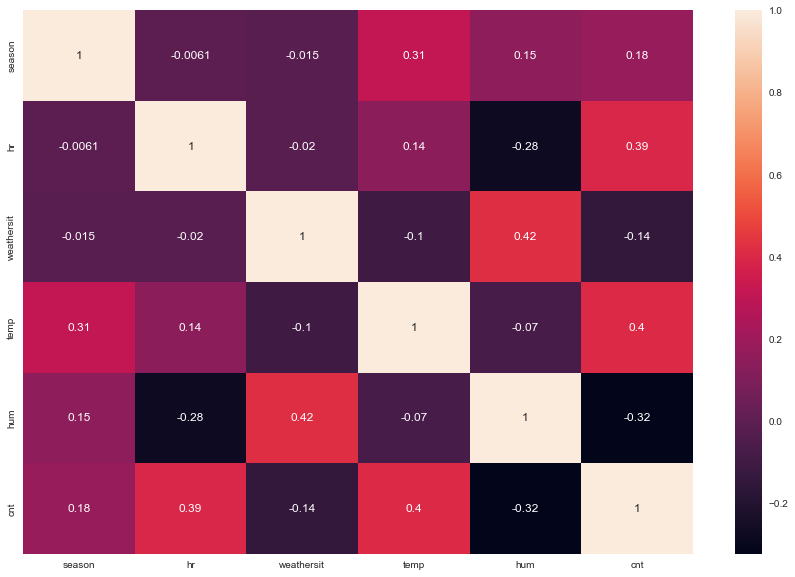

In [87]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_df.corr(), annot=True)

In [88]:
y = new_df['cnt']
X = new_df.drop(columns=['cnt'], axis=1)
y.shape
X.shape

(17379, 5)

In [89]:
y.shape

(17379,)

In [90]:
X.shape

(17379, 5)

In [91]:
new_df

,season,hr,weathersit,temp,hum,cnt
0,1,0,1,0.24,0.81,16
1,1,1,1,0.22,0.80,40
2,1,2,1,0.22,0.80,32
3,1,3,1,0.24,0.75,13
4,1,4,1,0.24,0.75,1
...,...,...,...,...,...,...
17374,1,19,2,0.26,0.60,119
17375,1,20,2,0.26,0.60,89
17376,1,21,1,0.26,0.60,90
17377,1,22,1,0.26,0.56,61


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calcu_mult(new_df):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [93]:
calcu_mult(new_df)

,variables,VIF
0,season,6.770818
1,hr,3.455761
2,weathersit,7.156981
3,temp,7.298973
4,hum,10.786515


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=45, train_size = .80)


In [95]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [96]:
pca = PCA(n_components= 5)
model = pca.fit(X)
PCA(n_components= 4)
print(model.explained_variance_ratio_)
print(model.singular_values_)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

[9.65576152e-01 2.48378491e-02 8.39548423e-03 6.58173855e-04
 5.32340739e-04]
[911.53180538 146.19602113  84.99657704  23.79846109  21.40293896]


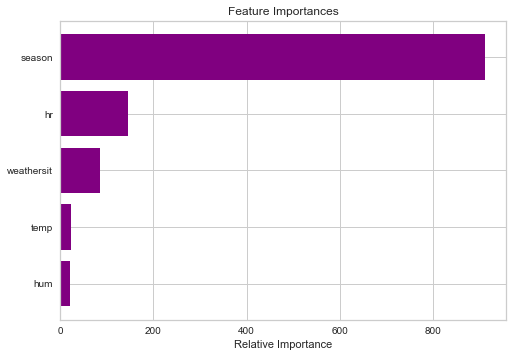

In [97]:
features = new_df.columns
importances = model.singular_values_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

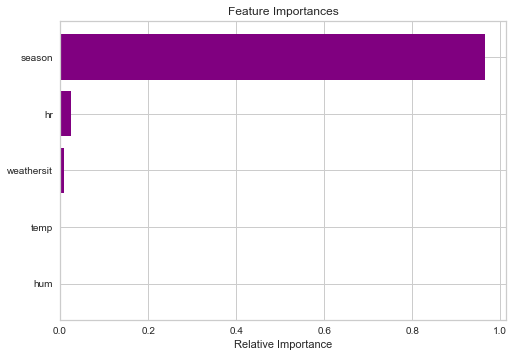

In [98]:
features = new_df.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [99]:
model = Ridge()
rental_count = model.fit(X_val, y_val)
rental_count

Ridge()

In [100]:
coef_deter =rental_count.score(X_val, y_val)
coef_deter

0.35338185440672065

In [101]:
1 - (1-model.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.35245012797214814

In [102]:
y_predict = rental_count.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  107.2878454984689
MSE :  21734.736872048044
R2 score :  0.34582000470936425


In [104]:
model = ElasticNet()
rental_count = model.fit(X_val, y_val)
rental_count

ElasticNet()

In [105]:
coef_deter = rental_count.score(X_val, y_val)
coef_deter

0.2195663387604092

In [106]:
1 - (1-model.score(X_val, y_val)) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.2184417945799486

In [107]:
y_predict = rental_count.predict(X_test)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE :",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE : 118.72242281110086
MSE :  25889.755854286657
R2 score :  0.22076073602647484


In [109]:
from sklearn import linear_model

rental_count = SGDRegressor()
rental_count = model.fit(X_val, y_val)

In [110]:
coef_deter= rental_count.score(X_val, y_val)
coef_deter

0.2195663387604092

In [111]:
1 - (1-model.score(X_val, y_val)) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.2184417945799486

In [112]:
y_predict = rental_count.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE :",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE : 118.72242281110086
MSE :  25889.755854286657
R2 score :  0.22076073602647484


In [114]:
model = PolynomialFeatures(degree = 10 , include_bias = False)
rental_count = model.fit_transform(X_train)
rental_count

array([[4.00000000e+00, 1.60000000e+01, 1.00000000e+00, ...,
        9.46339840e-05, 9.96147200e-05, 1.04857600e-04],
       [2.00000000e+00, 2.10000000e+01, 1.00000000e+00, ...,
        1.28984787e-01, 2.63577609e-01, 5.38615114e-01],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, ...,
        3.30326054e-02, 3.76778155e-02, 4.29762583e-02],
       ...,
       [3.00000000e+00, 1.20000000e+01, 1.00000000e+00, ...,
        7.77891825e-05, 4.00732152e-05, 2.06437775e-05],
       [3.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        4.93241173e-02, 6.41213525e-02, 8.33577583e-02],
       [4.00000000e+00, 2.00000000e+01, 1.00000000e+00, ...,
        3.34143093e-02, 4.94788811e-02, 7.32668047e-02]])

In [115]:
mod = LinearRegression()
mod.fit(rental_count, y_train)

LinearRegression()

In [116]:
coef_deter= mod.score(rental_count, y_train)
coef_deter

0.6814318814442464

In [117]:
1 - (1-mod.score(rental_count, y_train)) * (len(y_train)-1)/(len(y_train)-rental_count.shape[1]-1)

0.5936941298933865

In [118]:
y_predict = mod.predict(rental_count)

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE :",mean_absolute_error(y_train, y_predict))
print("MSE : ",mean_squared_error(y_train, y_predict))
print("R2 score : ",r2_score(y_train, y_predict))

MAE : 69.61887991267191
MSE :  10452.909076817921
R2 score :  0.6814318814442464


In [121]:
from yellowbrick.classifier import ClassificationReport

ln_model = LinearRegression()
visualizer = ClassificationReport(ln_model, support=True, force_model = True)

visualizer.fit(rental_count, y_train)
# visualizer.visualizer(rental_count, y_train)  
visualizer.score(rental_count, y_train)  
visualizer.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets